In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset from the file
data = pd.read_csv('Mobile phone price.csv')
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [3]:
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [5]:
# Renaming the columns
data = data.rename({'Brand':'brand',
             'Model':'model',
             'Storage ':'storage',
             'RAM ':'ram',
             'Screen Size (inches)':'screen_size',
             'Camera (MP)':'camera',
             'Battery Capacity (mAh)':'battery',
             'Price ($)':'price'},axis=1)

data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        407 non-null    object
 1   model        407 non-null    object
 2   storage      407 non-null    object
 3   ram          407 non-null    object
 4   screen_size  407 non-null    object
 5   camera       407 non-null    object
 6   battery      407 non-null    int64 
 7   price        407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [7]:
# converting the barnd and model to lowercase

data['brand'] = data['brand'].str.lower()
data['model'] = data['model'].str.lower()

In [8]:
#Removing the 'BG from the storage and ram

data['storage'] = data['storage'].str.replace('GB','')
data['ram'] = data['ram'].str.replace('GB','')

In [9]:
#Creating a new feature from camera: Number of cameras

data['n_cameras'] = data['camera'].str.count('\\+') + 1
data['n_cameras'].unique()

array([3, 4, 2, 1])

In [10]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price,n_cameras
0,apple,iphone 13 pro,128,6,6.1,12 + 12 + 12,3095,999,3
1,samsung,galaxy s21 ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199,4
2,oneplus,9 pro,128,8,6.7,48 + 50 + 8 + 2,4500,899,4
3,xiaomi,redmi note 10 pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,4
4,google,pixel 6,128,8,6.4,50 + 12.2,4614,799,2


In [11]:
# Creating four new feature and removing camera

res1 = []
res2 = []
res3 = []
res4 = []
for x in data['camera']:
    resolutions = x.split('+')
    tam = len(resolutions)

    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')

    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')

    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')

    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])

data['res1'] = res1
data['res2'] = res2
data['res3'] = res3
data['res4'] = res4

data = data.drop(columns='camera')

In [12]:
data.head()

,brand,model,storage,ram,screen_size,battery,price,n_cameras,res1,res2,res3,res4
0,apple,iphone 13 pro,128,6,6.1,3095,999,3,12,12,12,0
1,samsung,galaxy s21 ultra,256,12,6.8,5000,1199,4,108,10,10,12
2,oneplus,9 pro,128,8,6.7,4500,899,4,48,50,8,2
3,xiaomi,redmi note 10 pro,128,6,6.67,5020,279,4,64,8,5,2
4,google,pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0


In [13]:
# Cleaning data

for x in data:
    print(f' Type of {x} : {data[x].dtype}\n')

 Type of brand : object

 Type of model : object

 Type of storage : object

 Type of ram : object

 Type of screen_size : object

 Type of battery : int64

 Type of price : object

 Type of n_cameras : int64

 Type of res1 : object

 Type of res2 : object

 Type of res3 : object

 Type of res4 : object



In [14]:
data['res3'].unique()

array([' 12', ' 10 ', ' 8 ', ' 5 ', '0', ' 2 ', ' 16 ', ' 12 ', ' 2',
       ' 13 ', ' 5', ' 13', ' 12MP', ' 2MP', ' 2MP ', ' 12MP ', ' 13MP ',
       ' 8MP', ' 8MP ', ' 5MP ', ' 48MP', ' 5MP', ' 16MP ', ' 10MP ',
       '12', '2', '5', '10', '13', '40', '8', '16'], dtype=object)

In [15]:
data['res1'] = data['res1'].str.replace('MP','')
data['res2'] = data['res2'].str.replace('MP','')
data['res3'] = data['res3'].str.replace('MP','')
data['res4'] = data['res4'].str.replace('MP','')
data['price'] = data['price'].str.replace('$','')
data['price'] = data['price'].str.replace(',','.')
data.loc[88,'screen_size'] = '6.8'
data.loc[373,'screen_size'] = '7.6'
data.loc[342,'res4'] = 0
data.loc[342,'n_cameras'] = 3
data.loc[292,'res4'] = 0
data.loc[292,'n_cameras'] = 3
data.loc[312,'res4'] = 2
data.loc[312,'n_cameras'] = 4
data.loc[330,'res4'] = 0
data.loc[330,'n_cameras'] = 3
data.loc[361,'res4'] = 8
data.loc[361,'res3'] = 8
data.loc[361,'n_cameras'] = 4
data.loc[367,'res4'] = 0
data.loc[367,'n_cameras'] = 3
data.loc[376,'res4'] = 2
data.loc[376,'n_cameras'] = 4

In [17]:
 #Casting the features to numeric type

for feature in data:
    print(f'Type of {feature}: {data[feature].dtype}')

Type of brand: object
Type of model: object
Type of storage: object
Type of ram: object
Type of screen_size: object
Type of battery: int64
Type of price: object
Type of n_cameras: int64
Type of res1: object
Type of res2: object
Type of res3: object
Type of res4: object


In [18]:
data['storage'] = pd.to_numeric(data['storage'])

data['ram'] = pd.to_numeric(data['ram'])

data['screen_size'] = pd.to_numeric(data['screen_size'])

data['price'] = pd.to_numeric(data['price'])

data['res1'] = pd.to_numeric(data['res1'])

data['res2'] = pd.to_numeric(data['res2'])

data['res3'] = pd.to_numeric(data['res3'])

data['res4'] = pd.to_numeric(data['res4'])

In [19]:
for feature in data:
    print(f'Type of {feature}: {data[feature].dtype}')

Type of brand: object
Type of model: object
Type of storage: int64
Type of ram: int64
Type of screen_size: float64
Type of battery: int64
Type of price: float64
Type of n_cameras: int64
Type of res1: float64
Type of res2: float64
Type of res3: int64
Type of res4: float64


In [20]:
data.head()

,brand,model,storage,ram,screen_size,battery,price,n_cameras,res1,res2,res3,res4
0,apple,iphone 13 pro,128,6,6.10,3095,999.0,3,12.0,12.0,12,0.0
1,samsung,galaxy s21 ultra,256,12,6.80,5000,1199.0,4,108.0,10.0,10,12.0
2,oneplus,9 pro,128,8,6.70,4500,899.0,4,48.0,50.0,8,2.0
3,xiaomi,redmi note 10 pro,128,6,6.67,5020,279.0,4,64.0,8.0,5,2.0
4,google,pixel 6,128,8,6.40,4614,799.0,2,50.0,12.2,0,0.0


In [21]:
# Missing values and duplicate values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        407 non-null    object 
 1   model        407 non-null    object 
 2   storage      407 non-null    int64  
 3   ram          407 non-null    int64  
 4   screen_size  407 non-null    float64
 5   battery      407 non-null    int64  
 6   price        407 non-null    float64
 7   n_cameras    407 non-null    int64  
 8   res1         407 non-null    float64
 9   res2         407 non-null    float64
 10  res3         407 non-null    int64  
 11  res4         407 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 38.3+ KB


In [22]:
data.isna().sum(),data.isna().mean()

(brand          0
 model          0
 storage        0
 ram            0
 screen_size    0
 battery        0
 price          0
 n_cameras      0
 res1           0
 res2           0
 res3           0
 res4           0
 dtype: int64,
 brand          0.0
 model          0.0
 storage        0.0
 ram            0.0
 screen_size    0.0
 battery        0.0
 price          0.0
 n_cameras      0.0
 res1           0.0
 res2           0.0
 res3           0.0
 res4           0.0
 dtype: float64)

In [23]:
#49 rows of our data are duplicates, and that's 12% of all our data

In [24]:
absolute = data.duplicated().sum()

relative = data.duplicated().mean()*100

print(f'Duplicated:\n\ndata(#): {absolute}\n\nRelative: {round(relative,2)} %')

Duplicated:

data(#): 49

Relative: 12.04 %


In [25]:
# Removing duplicates.

dup = data[data.duplicated()]

data_without_dup = data.drop_duplicates()

data_without_dup.reset_index()

,index,brand,model,storage,ram,screen_size,battery,price,n_cameras,res1,res2,res3,res4
0,0,apple,iphone 13 pro,128,6,6.10,3095,999.0,3,12.0,12.0,12,0.0
1,1,samsung,galaxy s21 ultra,256,12,6.80,5000,1199.0,4,108.0,10.0,10,12.0
2,2,oneplus,9 pro,128,8,6.70,4500,899.0,4,48.0,50.0,8,2.0
3,3,xiaomi,redmi note 10 pro,128,6,6.67,5020,279.0,4,64.0,8.0,5,2.0
4,4,google,pixel 6,128,8,6.40,4614,799.0,2,50.0,12.2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,401,huawei,p30 lite,128,4,6.15,3340,329.0,3,48.0,8.0,2,0.0
354,402,samsung,galaxy note20 5g,128,8,6.70,4300,1049.0,3,12.0,64.0,12,0.0
355,403,xiaomi,mi 10 lite 5g,128,6,6.57,4160,349.0,4,48.0,8.0,2,2.0
356,404,apple,iphone 12 pro max,128,6,6.70,3687,1099.0,3,12.0,12.0,12,0.0


In [26]:
# Here you can see all duplicate data
dup

,brand,model,storage,ram,screen_size,battery,price,n_cameras,res1,res2,res3,res4
45,apple,iphone 12 mini,64,4,5.40,2227,699.0,2,12.0,12.0,0,0.0
61,xiaomi,poco m3 pro 5g,64,4,6.50,5000,199.0,3,48.0,2.0,2,0.0
77,apple,iphone 13,128,4,6.10,2815,799.0,2,12.0,12.0,0,0.0
78,samsung,galaxy s21,128,8,6.20,4000,799.0,3,64.0,12.0,12,0.0
132,nokia,xr20,128,6,6.67,4630,549.0,2,48.0,13.0,0,0.0
133,samsung,galaxy a52s 5g,128,6,6.50,4500,449.0,4,64.0,12.0,5,5.0
156,vivo,y21s,128,4,6.51,5000,179.0,2,50.0,2.0,0,0.0
160,vivo,v21e,128,8,6.44,4000,369.0,2,64.0,8.0,0,0.0
164,xiaomi,redmi note 10s,128,6,6.43,5000,229.0,4,64.0,8.0,2,2.0
165,oppo,a74 5g,128,6,6.50,5000,299.0,3,48.0,2.0,2,0.0


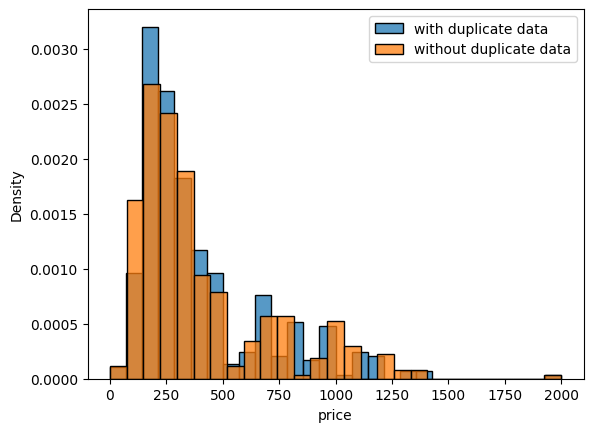

In [27]:
# The difference of price distribution with duplicate data and without duplicate data

sns.histplot(data=data,x='price',label='with duplicate data', stat='density')
sns.histplot(data=data_without_dup,x='price',label='without duplicate data',stat='density')
plt.legend();

In [28]:
data.shape , data_without_dup.shape

((407, 12), (358, 12))

In [29]:
407 - 358

49

In [30]:
# EDA
# I'll start with describe method
# We see that the minimum price is a mistake. A cell phone never costs 1 dollar

data_without_dup.describe().T

,count,mean,std,min,25%,50%,75%,max
storage,358.0,125.050279,67.913050,32.000,64.00,128.0,128.0,512.0
ram,358.0,5.910615,2.510002,2.000,4.00,6.0,8.0,16.0
screen_size,358.0,6.481508,0.302918,4.500,6.44,6.5,6.6,7.6
battery,358.0,4695.363128,780.972153,1821.000,4300.00,5000.0,5000.0,7000.0
price,358.0,401.675131,302.959522,1.199,199.00,284.0,466.5,1999.0
n_cameras,358.0,3.134078,0.755121,1.000,3.00,3.0,4.0,4.0
res1,358.0,43.616201,24.942903,8.000,13.00,48.0,64.0,108.0
res2,358.0,9.218436,10.493717,0.000,2.00,8.0,12.0,64.0
res3,358.0,3.737430,5.098283,0.000,2.00,2.0,5.0,48.0
res4,358.0,0.972905,1.762691,0.000,0.00,0.0,2.0,12.0


In [31]:
# Let's see the price distribution with plotly

# The data set has three cell phones priced between 0 and 19 dollars. This is an error and we will remove these rows

px.histogram(data_without_dup,x='price',nbins=100)

In [32]:
index = data_without_dup.query('price < 20').index
data_without_dup = data_without_dup.drop(index)
data_without_dup.shape

(355, 12)

In [33]:
# The most expensive cell phone
#We can see the 10 most expensive cell phones and the most expensive cell phone is galaxy z fold2 5g from Samsung costing $1999.
#Samsung accounts for 60% of the most expensive phones in the top 10
#Huawei corresponds to 20%
#The others corresponds to 30%


data_without_dup.sort_values(by='price',ascending=False).head(10)

,brand,model,storage,ram,screen_size,battery,price,n_cameras,res1,res2,res3,res4
373,samsung,galaxy z fold2 5g,256,12,7.60,4500,1999.0,3,12.0,12.0,12,0.0
367,samsung,galaxy s20 ultra 5g,512,16,6.90,5000,1399.0,3,108.0,48.0,12,0.0
361,huawei,p40 pro+,512,8,6.58,4200,1399.0,4,50.0,40.0,8,8.0
57,apple,iphone 13 pro max,256,6,6.70,4352,1299.0,3,12.0,12.0,12,0.0
288,samsung,galaxy note 20 ultra,256,12,6.90,4500,1299.0,3,108.0,12.0,12,0.0
309,samsung,galaxy s21 ultra 5g,256,12,6.80,5000,1199.0,4,108.0,10.0,10,12.0
1,samsung,galaxy s21 ultra,256,12,6.80,5000,1199.0,4,108.0,10.0,10,12.0
9,vivo,x70 pro+,256,12,6.78,4500,1199.0,4,50.0,48.0,12,8.0
14,oppo,find x3 pro,256,12,6.70,4500,1199.0,4,50.0,50.0,13,3.0
392,samsung,galaxy s20 ultra 5g,128,12,6.90,5000,1199.0,4,108.0,48.0,12,0.3


In [34]:
# The most frequent brand
#Samsung accounts for 17.75% of the entire dataset and is the most frequent brand.
#The second most frequent brand is Xiaomi which corresponds to 15.77%
#Third is Oppo with 14.37%


most_frequent = data_without_dup.groupby('brand').size().sort_values(ascending=False)

total_of_mobiles = 355

for brand,quant in most_frequent.items():
    print(f"{brand.capitalize()} has {quant} mobiles and corresponds to {round(quant/total_of_mobiles * 100,2)}% of the entire dataset\n")

Samsung has 63 mobiles and corresponds to 17.75% of the entire dataset

Xiaomi has 56 mobiles and corresponds to 15.77% of the entire dataset

Oppo has 51 mobiles and corresponds to 14.37% of the entire dataset

Realme has 42 mobiles and corresponds to 11.83% of the entire dataset

Vivo has 31 mobiles and corresponds to 8.73% of the entire dataset

Apple has 25 mobiles and corresponds to 7.04% of the entire dataset

Nokia has 24 mobiles and corresponds to 6.76% of the entire dataset

Motorola has 22 mobiles and corresponds to 6.2% of the entire dataset

Oneplus has 13 mobiles and corresponds to 3.66% of the entire dataset

Huawei has 12 mobiles and corresponds to 3.38% of the entire dataset

Google has 5 mobiles and corresponds to 1.41% of the entire dataset

Asus has 4 mobiles and corresponds to 1.13% of the entire dataset

Blackberry has 3 mobiles and corresponds to 0.85% of the entire dataset

Lg has 3 mobiles and corresponds to 0.85% of the entire dataset

Cat has 1 mobiles and cor

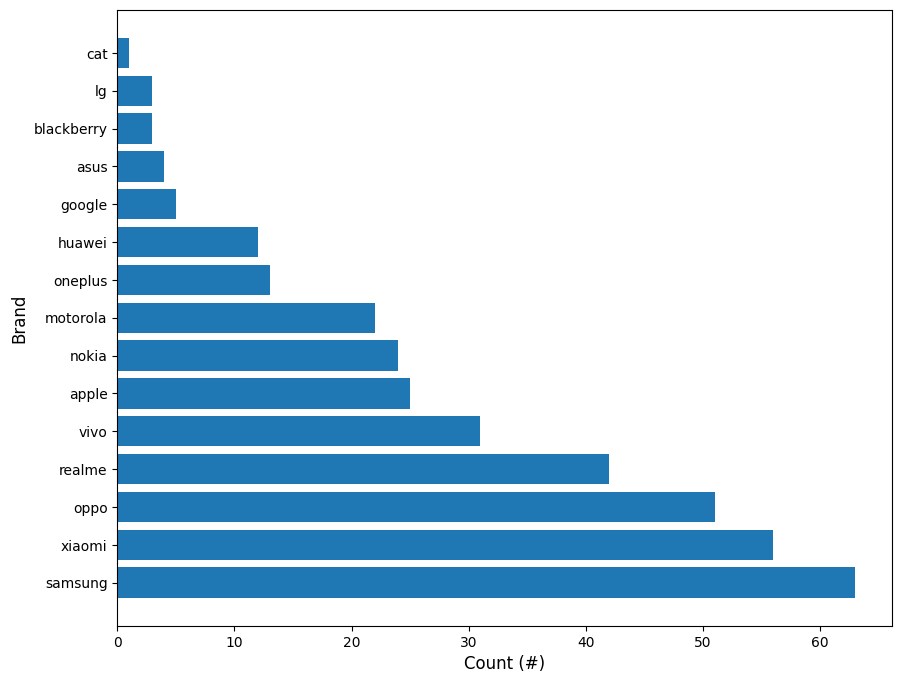

In [35]:
#fig ,ax = plt.subplots(1,1,constrained_layout=True,figsize=(20,10))
plt.figure(figsize=(10,8))
ex = most_frequent.keys()
ey = most_frequent.values

plt.barh(y=ex,width=ey)
plt.xlabel('Count (#)',fontsize=12)
plt.ylabel('Brand',fontsize=12);


#ax[0].barh(y=ex,width=ey)
#ax[0].set_xlabel('Count (#)',fontsize=12)
#ax[0].set_ylabel('Brand',fontsize=12)

#ax[1].plot(ey,ex)
#ax[1].set_xlabel('Count (#)',fontsize=12)

In [36]:
#Which is the most expensive and cheapest brand?
#The most expensive brand is Asus and the cheapest is Realme
#Perhaps it would be more interesting to consider only brands with more cell phones. But we can leave that for later.

In [37]:
costs = data_without_dup.groupby('brand')['price'].mean().sort_values(ascending=False)

for brand,price in costs.items():
    print(f"On average {brand.capitalize()} costs ${round(price,2)}\n")

On average Asus costs $874.0

On average Huawei costs $783.17

On average Apple costs $783.0

On average Google costs $699.0

On average Oneplus costs $664.38

On average Lg costs $615.67

On average Blackberry costs $499.0

On average Samsung costs $470.13

On average Oppo costs $387.43

On average Vivo costs $337.39

On average Cat costs $299.0

On average Xiaomi costs $275.96

On average Motorola costs $272.64

On average Nokia costs $230.25

On average Realme costs $208.05



In [38]:
#The most expensive and cheapest cell phone for the top 10 most frequent brands

top10 = most_frequent.head(10)
print('To remember, the top10 brands are: \n')
for brand in top10.keys():
    print(brand,'\n')

To remember, the top10 brands are: 

samsung 

xiaomi 

oppo 

realme 

vivo 

apple 

nokia 

motorola 

oneplus 

huawei 



<Axes: xlabel='price', ylabel='brand'>

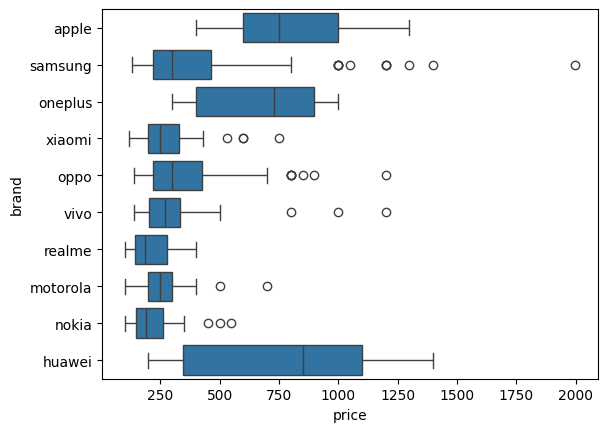

In [39]:
#We will start with the distribution of prices for each top10 brand

top10 = data_without_dup.query(f'brand == {top10.keys().tolist()}')

sns.boxplot(data=top10,x='price',y='brand')

In [40]:
print('The expensive cell phones of each brand')
top10.groupby('brand')[['model','price']].max().sort_values(by='price',ascending=False)

The expensive cell phones of each brand


,model,price
brand,,
samsung,galaxy z fold2 5g,1999.0
huawei,y7p,1399.0
apple,iphone xs max,1299.0
oppo,reno6 z 5g,1199.0
vivo,y72 5g,1199.0
oneplus,nord n10 5g,999.0
xiaomi,redmi note 9s,749.0
motorola,moto g9 power lite,699.0
nokia,xr20,549.0


In [41]:
print('The cheapest cell phones of each brand')
top10.groupby('brand')[['model','price']].min().sort_values(by='price',ascending=False)

The cheapest cell phones of each brand


,model,price
brand,,
apple,iphone 11,399.0
oneplus,7 pro,299.0
huawei,mate 30 pro 5g,199.0
oppo,a12,139.0
vivo,v20 se,139.0
samsung,galaxy a02s,129.0
xiaomi,mi 10 lite 5g,119.0
nokia,1.4,99.0
motorola,edge 20 fusion,99.0


In [42]:
#What are the features that have some correlation with the price?

#First strategy: Plot each feature with price.

#Second strategy: Calculate the correlation coefficient to measure a linear correlation.

#Most features have a linear correlation with price. However, we also observe linear correlation between features, for example: Storage and Ram have 0.68 correlation and so on.

#We can also calculate the VIF (variance inflation factor) to measure the degree of multicollinearity.

#Correlation of features with price:

#storage: 0.729
#res3: 0.632
#res2: 0.631
#ram: 0.630
#res4: 0.202
#res1: 0.127
#screen_size: 0.082
#n_cameras: 0.056
#battery: -0.409


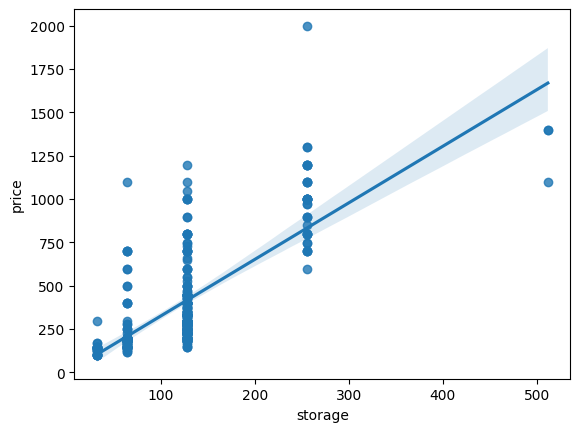

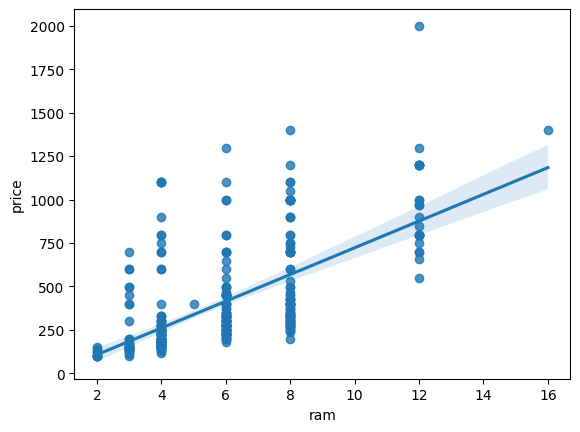

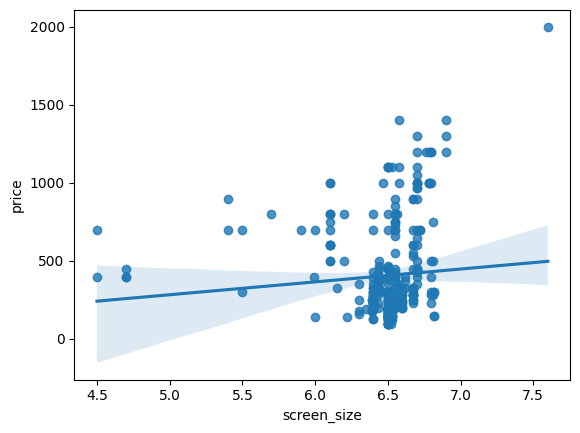

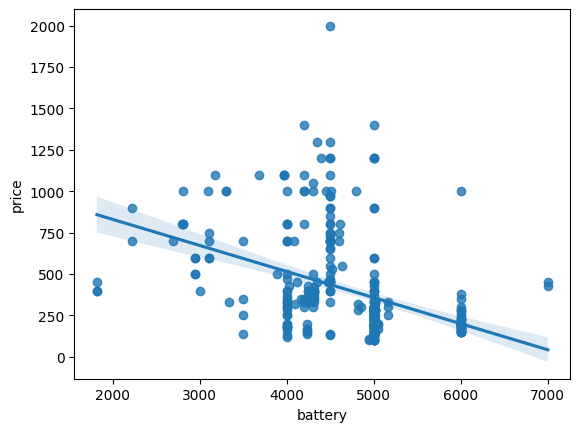

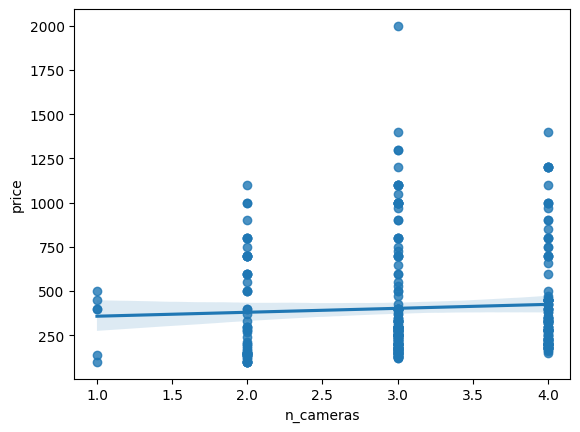

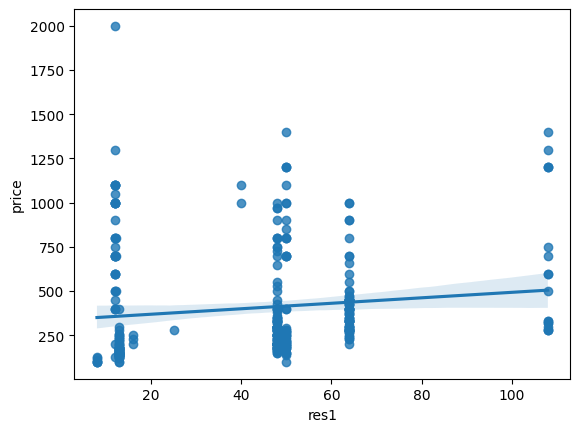

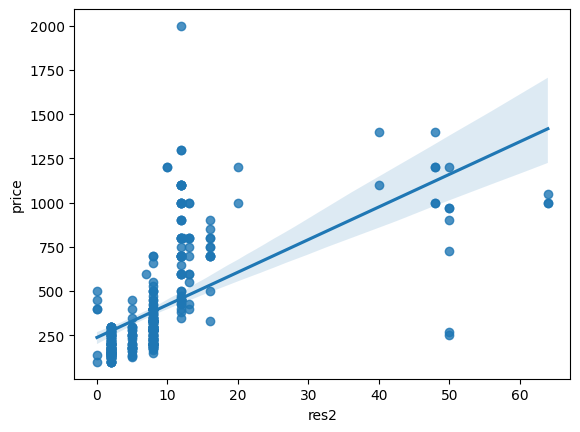

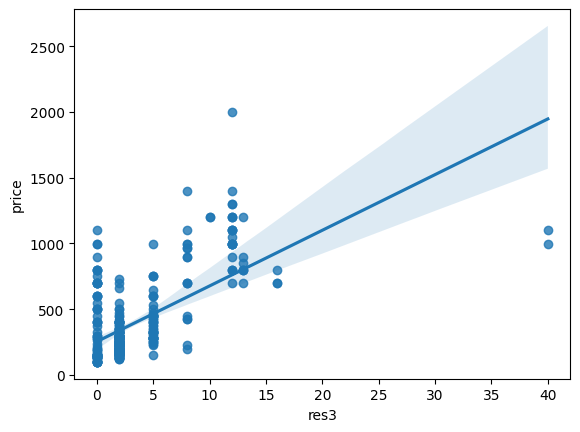

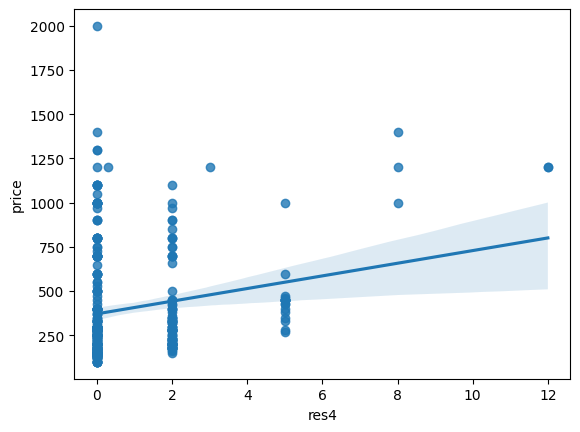

In [43]:
for feature in data_without_dup:
    if feature in ['brand','model','price']:
        continue

    sns.regplot(y=data_without_dup['price'],x=data_without_dup[feature])
    plt.show()

In [45]:
#More Questions and new features
#Our dataset has some brands from different continents and countries, for example:

#Apple - United States - North America

#Samsung - South Korea - Asia

#Xiaomi - China - Asia

#etc...

#Is there any difference about country or continent? If yes, what are the differences? Are price and other variables affected by country or continent?

#To answer these questions we need to add two new features: Country and Continente. So let's go!

In [46]:
print('The brands are: \n')
for brands in data_without_dup['brand'].unique():
    print(brands.capitalize(),'\n')

The brands are: 

Apple 

Samsung 

Oneplus 

Xiaomi 

Google 

Oppo 

Vivo 

Realme 

Motorola 

Nokia 

Lg 

Asus 

Blackberry 

Cat 

Huawei 



In [48]:
data_without_dup.reset_index(inplace=True)

In [49]:
data_without_dup[['country','continent']] = np.nan

for index,brand in enumerate(data_without_dup['brand']):

    if brand in ['apple','cat','google', 'motorola']:
        data_without_dup.loc[index,'country'] = 'united states'
        data_without_dup.loc[index,'continent'] = 'north america'

    elif brand in ['blackberry']:
        data_without_dup.loc[index,'country'] = 'canada'
        data_without_dup.loc[index,'continent'] = 'north america'

    elif brand in ['nokia']:
        data_without_dup.loc[index,'country'] = 'finland'
        data_without_dup.loc[index,'continent'] = 'europa'

    elif brand in ['samsung','lg']:
        data_without_dup.loc[index,'country'] = 'south korean'
        data_without_dup.loc[index,'continent'] = 'asia'

    else:
        data_without_dup.loc[index,'country'] = 'china'
        data_without_dup.loc[index,'continent'] = 'asia'

<ipython-input-49-e802abe1a867>:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'united states' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

<ipython-input-49-e802abe1a867>:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'north america' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [50]:
data_without_dup.head(10)

,level_0,index,brand,model,storage,ram,screen_size,battery,price,n_cameras,res1,res2,res3,res4,country,continent
0,0,0,apple,iphone 13 pro,128,6,6.10,3095,999.0,3,12.0,12.0,12,0.0,united states,north america
1,1,1,samsung,galaxy s21 ultra,256,12,6.80,5000,1199.0,4,108.0,10.0,10,12.0,south korean,asia
2,2,2,oneplus,9 pro,128,8,6.70,4500,899.0,4,48.0,50.0,8,2.0,china,asia
3,3,3,xiaomi,redmi note 10 pro,128,6,6.67,5020,279.0,4,64.0,8.0,5,2.0,china,asia
4,4,4,google,pixel 6,128,8,6.40,4614,799.0,2,50.0,12.2,0,0.0,united states,north america
5,5,5,apple,iphone 13,128,4,6.10,2815,799.0,2,12.0,12.0,0,0.0,united states,north america
6,6,6,samsung,galaxy z flip3,256,8,6.70,3300,999.0,2,12.0,12.0,0,0.0,south korean,asia
7,7,7,xiaomi,poco x3 pro,128,6,6.67,5160,249.0,4,48.0,8.0,2,2.0,china,asia
8,8,8,oppo,reno6 pro+ 5g,128,8,6.55,4500,699.0,4,50.0,13.0,16,2.0,china,asia
9,9,9,vivo,x70 pro+,256,12,6.78,4500,1199.0,4,50.0,48.0,12,8.0,china,asia


In [51]:
#Let's do a basic exploration on Contry and Continent features

# 1. Continent Statistics:

# 77.46% of cell phones are from Asia
# 15.77% of cell phones are from North america
# 6.76% of cell phones are from Europa
# 2. Country Statistics:

# 58.87% of cell phones are from China
# 18.59% of cell phones are from South korean
# 14.93% of cell phones are from United states
# 6.76% of cell phones are from Finland
# 0.85% of cell phones are from Canada
# Samsung is the most frequent brand, however Chinese brands together dominate our dataset.

# On average/median, North American cell phones are more expensive than Asian cell phones. And US cell phone prices are more dispersed than Asian ones.

In [52]:
most_frequent_country = data_without_dup.groupby('country').size().sort_values(ascending=False)
most_frequent_continent = data_without_dup.groupby('continent').size().sort_values(ascending=False)

total_of_mobiles = 355

for continent,quant in most_frequent_continent.items():
    print(f'{round(quant/total_of_mobiles*100,2)}%  ({quant}) of cell phones are from {continent.capitalize()}')

print()
for country,quant in most_frequent_country.items():
    print(f'{round(quant/total_of_mobiles*100,2)}%  ({quant}) of cell phones are from {country.capitalize()}')

77.46%  (275) of cell phones are from Asia
15.77%  (56) of cell phones are from North america
6.76%  (24) of cell phones are from Europa

58.87%  (209) of cell phones are from China
18.59%  (66) of cell phones are from South korean
14.93%  (53) of cell phones are from United states
6.76%  (24) of cell phones are from Finland
0.85%  (3) of cell phones are from Canada


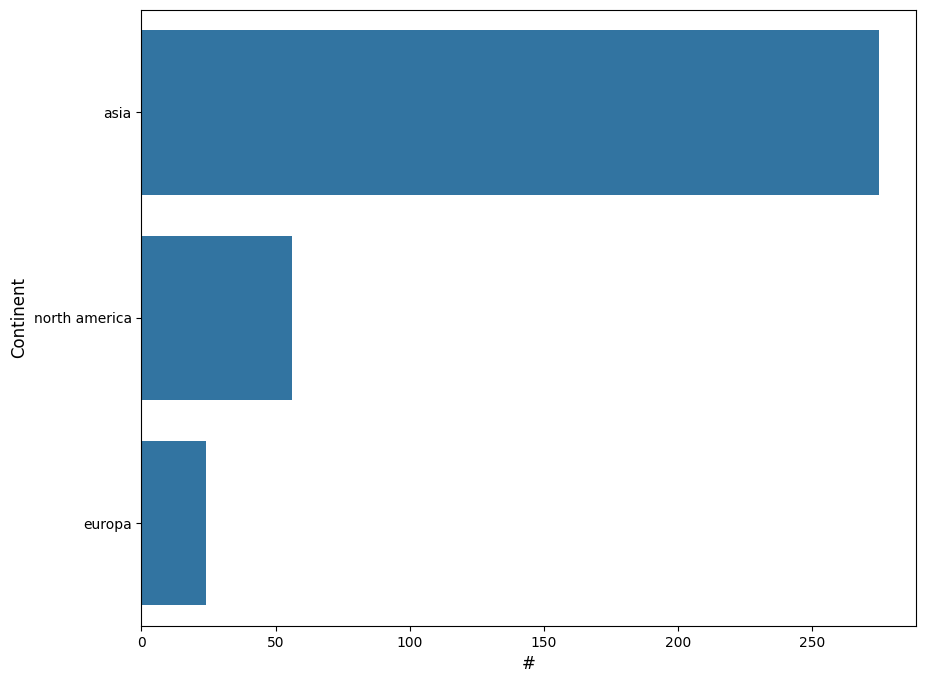

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(x=most_frequent_continent.values, y=most_frequent_continent.keys())

plt.ylabel('Continent',fontsize=12)
plt.xlabel('#',fontsize=12);

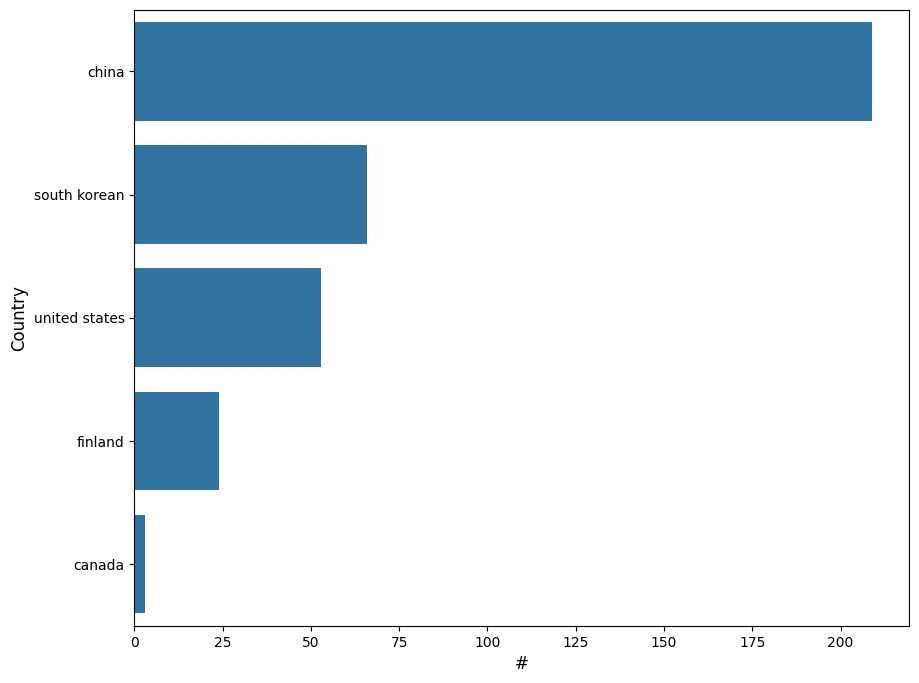

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x=most_frequent_country.values, y=most_frequent_country.keys())

plt.ylabel('Country',fontsize=12)
plt.xlabel('#',fontsize=12);

<Axes: xlabel='price', ylabel='country'>

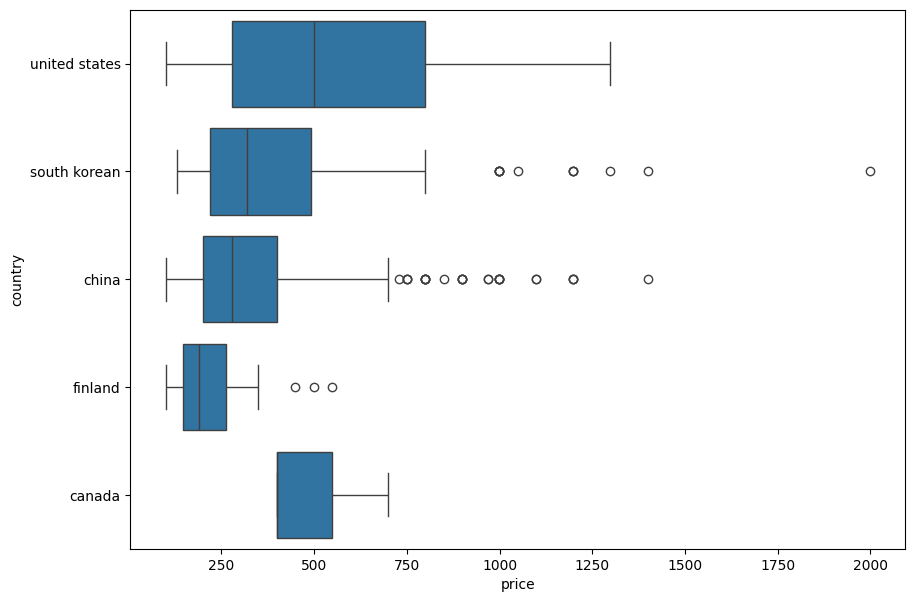

In [55]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data_without_dup,x='price',y='country')

<Axes: xlabel='price', ylabel='continent'>

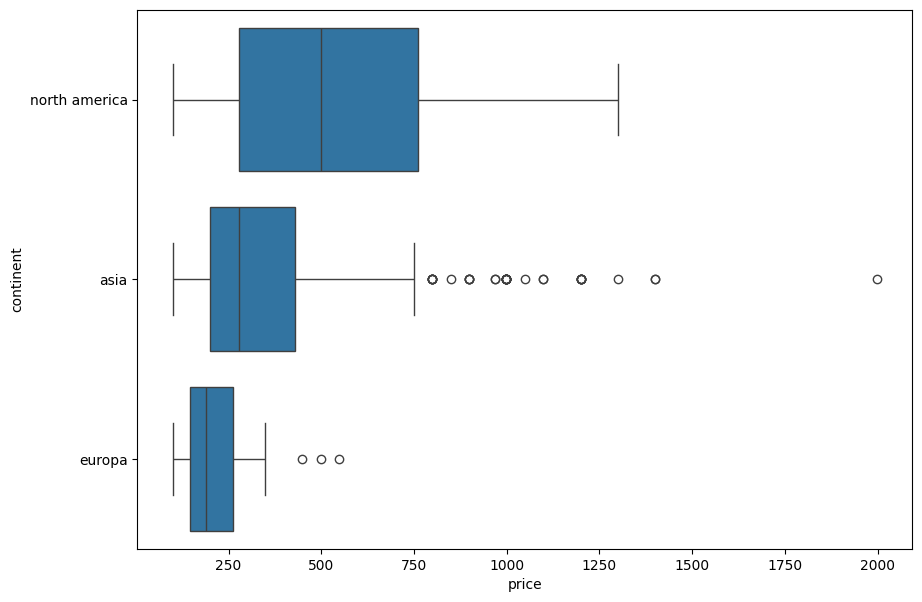

In [56]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data_without_dup,x='price',y='continent')

In [57]:
statistics_price = data_without_dup.groupby('continent')['price'].agg(['mean','median','std']).sort_values(by='mean',ascending=False)

statistics_price['Coefficient_of_variation'] = statistics_price['std'] / statistics_price['mean']

statistics_price

,mean,median,std,Coefficient_of_variation
continent,,,,
north america,551.142857,499.0,310.224050,0.562874
asia,390.567273,279.0,299.983610,0.768072
europa,230.250000,189.0,122.521072,0.532122


In [58]:
# What are the differences between North American cell phones and Asian cell phones

# The strategy for analyzing this is to calculate the base statistic for each feature for each continent. We observed, on average, that Asian cell phones have better values ​​than North American ones.

In [59]:
# Let's calculate the total resolution (res1 + res2 + res3 + res4) to simplify the analysis

data_without_dup['total_resolution'] = data_without_dup['res1'] + data_without_dup['res2'] + data_without_dup['res3'] + data_without_dup['res4']
data_without_dup.head()

,level_0,index,brand,model,storage,ram,screen_size,battery,price,n_cameras,res1,res2,res3,res4,country,continent,total_resolution
0,0,0,apple,iphone 13 pro,128,6,6.10,3095,999.0,3,12.0,12.0,12,0.0,united states,north america,36.0
1,1,1,samsung,galaxy s21 ultra,256,12,6.80,5000,1199.0,4,108.0,10.0,10,12.0,south korean,asia,140.0
2,2,2,oneplus,9 pro,128,8,6.70,4500,899.0,4,48.0,50.0,8,2.0,china,asia,108.0
3,3,3,xiaomi,redmi note 10 pro,128,6,6.67,5020,279.0,4,64.0,8.0,5,2.0,china,asia,79.0
4,4,4,google,pixel 6,128,8,6.40,4614,799.0,2,50.0,12.2,0,0.0,united states,north america,62.2


In [60]:
# Mean and standard deviation for multiple features
data_without_dup.groupby('continent')[['storage','ram','screen_size','battery','n_cameras','total_resolution']].agg(['mean','std','median'])

storage                         ram                   \
                     mean        std median      mean       std median   
continent                                                                
asia           130.094545  65.238293  128.0  6.316364  2.497792    6.0   
europa          72.000000  39.191836   64.0  3.791667  1.473805    4.0   
north america  118.285714  77.887965  128.0  4.571429  1.693379    4.0   

              screen_size                       battery                       \
                     mean       std median         mean          std  median   
continent                                                                      
asia             6.541855  0.133856   6.51  4868.981818   582.627966  5000.0   
europa           6.523333  0.202585   6.50  4500.000000   690.078760  4500.0   
north america    6.162500  0.600113   6.40  3919.107143  1133.006069  3984.5   

              n_cameras                  total_resolution                    
                   mean       std median             mean        std median  
continent                                                                    
asia           3.287273  0.678947    3.0        61.873818  30.244159   60.0  
europa         2.833333  0.816497    3.0        36.458333  23.511291   25.5  
north america  2.500000  0.738549    2.5        42.657143  27.650145   36.0

In [61]:
# Is there any difference between Asian phones?

#The strategy is the same as in the previous analysis.

# We can see that South Korean cell phones are a little more expensive than Chinese ones. The two countries have similar cell phones, however, the number of cameras and the battery are better for the South Korean.

In [62]:
asia = data_without_dup.query('continent == "asia"')

In [63]:
asia.groupby('country')[['storage','ram','screen_size','battery','n_cameras','total_resolution','price']].agg(['mean','std'])

storage                  ram           screen_size            \
                    mean        std      mean       std        mean       std   
country                                                                         
china         129.377990  62.071421  6.397129  2.445599    6.530191  0.104251   
south korean  132.363636  74.865137  6.060606  2.659548    6.578788  0.197301   

                  battery             n_cameras           total_resolution  \
                     mean         std      mean       std             mean   
country                                                                      
china         4838.133971  533.563052  3.220096  0.685971        59.215311   
south korean  4966.666667  712.165351  3.500000  0.613941        70.292424   

                              price              
                    std        mean         std  
country                                          
china         29.058074  363.354067  262.260310  
south korean  32.544938  476.742424  386.424729

In [64]:
# EDA Conclusion
# We saw that Samsung has the most expensive cell phone, and Samsung makes up (proportionally) 60% of the most expensive top 10 brands.

# Samsung is also the most frequent brand in our dataset, accounting for 17.75% of all data.

# The most expensive brand is Asus (on average 874 dollars) and Realme the cheapest (on average 208 dollars). Asus only has a four cell phones in our dataset, so it might be interesting to consider more frequent brands.

# We saw that most features have some linear correlation with price, however, some features are correlated with others and this may indicate multicollinearity. We can measure this with the Variation Inflation Error.

# Continent Statistics:
# 77.46% of cell phones are from Asia
# 15.77% of cell phones are from North America
# 6.76% of cell phones are from Europa
# Country Statistics:
# 58.87% of cell phones are from China
# 18.59% of cell phones are from South korean
# 14.93% of cell phones are from United states
# 6.76% of cell phones are from Finland
# 0.85% of cell phones are from Canada
# Samsung is the most frequent brand, however Chinese brands together dominate our dataset.

# On average/median, North American cell phones are more expensive than Asian cell phones. And US cell phone prices are more dispersed than Asian ones.

# We observed, on average, that Asian cell phones have better values than North American ones.

# We saw that South Korean cell phones are a little more expensive than Chinese ones. The two countries have similar cell phones, however, the number of cameras and the battery are better for the South Korean.